In [1]:
checkpoint_path = '/home/seokj/ray_results'
checkpoint_path += '/train_loop_per_worker_2023-06-28_11-56-25/train_loop_per_worker_60e19_00005_5_lr=0.0030,hidden_size=512,num_layer=1_2023-06-28_11-56-28/checkpoint_000099'

In [4]:
import torch
torch.load(checkpoint_path)

IsADirectoryError: [Errno 21] Is a directory: '/home/seokj/ray_results/train_loop_per_worker_2023-06-28_11-56-25/train_loop_per_worker_60e19_00005_5_lr=0.0030,hidden_size=512,num_layer=1_2023-06-28_11-56-28/checkpoint_000099'

In [5]:
import ray.air.checkpoint
import ray.train.torch

checkpoint = ray.train.torch.TorchCheckpoint.from_directory(checkpoint_path)
checkpoint

TorchCheckpoint(local_path=/home/seokj/ray_results/train_loop_per_worker_2023-06-28_11-56-25/train_loop_per_worker_60e19_00005_5_lr=0.0030,hidden_size=512,num_layer=1_2023-06-28_11-56-28/checkpoint_000099)

In [6]:
from ray.train.torch import TorchPredictor
predictor = TorchPredictor.from_checkpoint(checkpoint)
predictor

ModuleNotFoundError: No module named 'model'

In [83]:
import datasource
import torch
data = datasource.get_data()
_, index = datasource.get_index_splited_by_time(data)
dataset = datasource.FSRDataset(data['FSR_for_force'], data['force'], index)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=None)

In [84]:
X, y = dataset[0]

In [85]:
pred = predictor.predict(X)['predictions']
pred

array([[ 3.93370148e+02,  7.39486206e+02,  9.93619507e+02,
         3.02598343e+01,  2.34148392e+02,  4.25351372e+01],
       [ 4.25401215e+02,  7.52379028e+02,  1.14307947e+03,
        -6.65664673e-01,  2.92831146e+02,  4.85785370e+01],
       [ 4.47054596e+02,  7.09944946e+02,  1.10069983e+03,
        -8.87255554e+01,  3.13853760e+02,  4.92422409e+01],
       [ 4.43317291e+02,  6.38523499e+02,  9.96188232e+02,
        -1.47290588e+02,  3.14804077e+02,  5.01755829e+01],
       [ 4.38265198e+02,  5.77812256e+02,  9.01123169e+02,
        -2.12532776e+02,  3.16547058e+02,  5.57439003e+01],
       [ 4.19284180e+02,  4.40636597e+02,  7.31041748e+02,
        -1.97955750e+02,  3.13699829e+02,  5.83779030e+01],
       [ 4.00255127e+02,  3.12001404e+02,  5.30216553e+02,
        -1.30941284e+02,  2.92798065e+02,  5.01364670e+01],
       [ 3.32596497e+02,  2.09218246e+02,  3.57003448e+02,
        -1.47622040e+02,  2.48674438e+02,  4.25140228e+01],
       [ 1.92063293e+02,  3.64142456e+01,  2.363

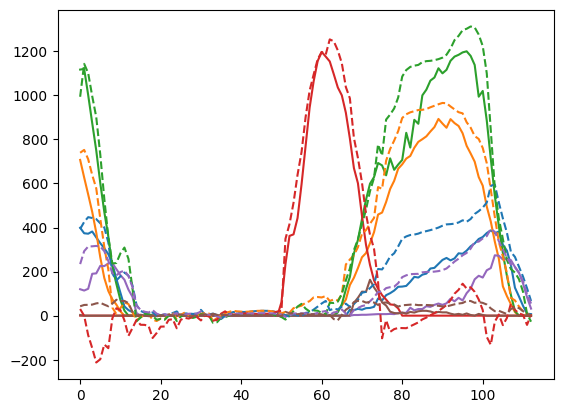

In [86]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
style = ax.plot(y, label=[1, 2, 3, 4, 5, 6])
for i in range(6):
    ax.plot(pred[:, i], color=style[i].get_color(), linestyle='--')